# 2D Optics Tutorial: Interband absorption spectrum of a GaAs cylindrical quantum wire

**Authors: Naoki Mitsui (simulation), Brandon Loke (write-up and visualisations)**

This tutorial calculates the optical spectrum of a GaAs cylindrical quantum wire with infinite barriers.


In [1]:
import nextnanopy as nn
import numpy as np
import matplotlib.pyplot as plt
import os, pathlib
import re
import seaborn as sns
from matplotlib.gridspec import GridSpec
%matplotlib inline

## Initialise the filepaths

We need both kp8 and single band calculations to plot the figures. The variables have been changed in their respective inputfiles.

In [2]:
inputpath_kp8 = r'D:\nextnano tutorials\2Dcircular_infinite_well_GaAs_inter\2Dcircular_infinite_well_GaAs_inter_kp8.in'
inputfile_kp8 = nn.InputFile(inputpath_kp8)
inputpath_single = r'D:\nextnano tutorials\2Dcircular_infinite_well_GaAs_inter\2Dcircular_infinite_well_GaAs_inter_singleband.in'
inputfile_single = nn.InputFile(inputpath_single)

In [3]:
### These are the files we are interested in

datafiles = {
    r'bias_00000' : ['bandedge_Gamma.vtr', 'bandedge_Gamma_1d_horizontal_slice_middle_along_y.dat'],
    r'bias_00000\Quantum' : ['amplitudes_quantum_region_Gamma_00000.vtr', 'energy_spectrum_quantum_region_Gamma_00000.dat', 'energy_spectrum_quantum_region_kp8_00000.dat'],
    r'bias_00000\Optics' : ['absorption_quantum_region_kp8_z_eV.dat', 'absorption_quantum_region_kp8_x_eV.dat', 'absorption_quantum_region_kp8_y_eV.dat', 'occupation_disp_quantum_region_kp8_16.dat', 'occupation_disp_quantum_region_kp8_1.dat', 'occupation_disp_quantum_region_kp8_17.dat']
}

datafiles_single = {
    r'bias_00000' : ['bandedge_Gamma.vtr', 'bandedge_Gamma_1d_horizontal_slice_middle_along_y.dat'],
    r'bias_00000\Quantum' : ['amplitudes_quantum_region_Gamma_00000.vtr', 'energy_spectrum_quantum_region_Gamma_00000.dat'],
}

In [4]:
def remove_extension(filename):
    return re.match(r'([^.]+)',filename).group(0)

def get_extension(filename):
    return '.'+ re.search(r'\.(.*)',filename).group(1)

def get_filename_no_extension(input_file):
    file = re.search(r'[^\\]*$', input_file.fullpath).group(0)
    return remove_extension(file)

def get_filename_extension(input_file):
    file = re.search(r'[^\\]*$', input_file.fullpath).group(0)
    return get_extension(file)

In [5]:
def execute_input_file(input_file, software, biases, datafiles):
    software = 'nextnano++'
    d = {}
    filename_no_extension = get_filename_no_extension(input_file)
    FileExtension = get_filename_extension(input_file)
    
    output_folder = nn.config.config[software]['outputdirectory']
    input_file.execute()
    
    for bias in biases:
            d[bias] = {}
            
            for k,v in datafiles.items():
                temp_key = re.search(r'([^\\]+$)', k).group(0)
                if 'bias' in temp_key:
                    d[bias] = {}
                
                    for dat in v:
                        dat = dat.replace('00000', bias)
                        foldername = get_filename_no_extension(input_file)
                        p = os.path.join(output_folder, fr'{foldername}' + fr'\{k}' + fr'\{dat}')
                        data = nn.DataFile(p, product = software)
                        d[bias][dat] = data
                else:
                    d[bias][temp_key] = {}
                
                    for dat in v:
                        dat = dat.replace('00000', bias)
                        p = os.path.join(output_folder, fr'{foldername}' + fr'\{k}' + fr'\{dat}')
                        data = nn.DataFile(p, product = software)
                        d[bias][temp_key][dat] = data
    return d

In [6]:
inputfile_kp8.product

'nextnano++'

In [7]:
kp8data = execute_input_file(inputfile_kp8, inputfile_kp8.product, ['00000'], datafiles)

STARTING...
Starting execution as:
C:\Program Files\nextnano\2021_12_24\nextnano++\bin 64bit\nextnano++_Intel_64bit.exe --license C:\Users\brandon.loke\Documents\nextnano\License\License_nnp.lic --database C:\Program Files\nextnano\2021_12_24\nextnano++\Syntax\database_nnp.in --threads 0 --outputdirectory D:\nextnano output\2Dcircular_infinite_well_GaAs_inter_kp8 --noautooutdir D:\nextnano tutorials\2Dcircular_infinite_well_GaAs_inter\2Dcircular_infinite_well_GaAs_inter_kp8.in 

nextnano++ (1.9.3 - 2021.122001) Jan 25 2022
COPYRIGHT NOTICE                                                             
Please read the file 'copyright_nextnano++.txt' in your installation folder  
for further information about the terms of copyright of the nextnano++ code  
and of third party source codes and libraries used in the nextnano++ code.   
                                                                             
In case this file is missing or seems incomplete or corrupted, please contact
nex

   Computing approx. (subspace) spectrum for k = (0,0,0.345623386) [1/nm]
   Solving dense hermitian eigenvalue problem (standard solver)...
      Full complex hermitian eigenvalue solver:           1          60
      
   Computing approx. (subspace) spectrum for k = (0,0,0.403227283) [1/nm]
   Solving dense hermitian eigenvalue problem (standard solver)...
      Full complex hermitian eigenvalue solver:           1          60
      
   Computing approx. (subspace) spectrum for k = (0,0,0.460831181) [1/nm]
   Solving dense hermitian eigenvalue problem (standard solver)...
      Full complex hermitian eigenvalue solver:           1          60
      
   Computing approx. (subspace) spectrum for k = (0,0,0.518435079) [1/nm]
   Solving dense hermitian eigenvalue problem (standard solver)...
      Full complex hermitian eigenvalue solver:           1          60
      
   Computing approx. (subspace) spectrum for k = (0,0,0.576038976) [1/nm]
   Solving dense hermitian eigenvalue problem 

   E_p - intraband: 2 34 1.4712622
   E_p - intraband: 3 34 3.30252604
   E_p - intraband: 4 33 3.30252588
   E_p - intraband: 7 40 2.76047056
   E_p - intraband: 8 39 2.76047243
   E_p - intraband: 11 39 5.728148
   E_p - intraband: 11 47 1.07841957
   E_p - intraband: 12 40 5.72815996
   E_p - intraband: 12 48 1.07841896
   E_p - intraband: 17 35 1.59062978
   E_p - intraband: 17 36 1.47303024
   E_p - intraband: 17 43 1.93707505
   E_p - intraband: 18 35 1.47303035
   E_p - intraband: 18 36 1.59062989
   E_p - intraband: 18 44 1.93707502
   E_p - intraband: 19 41 1.42213999
   E_p - intraband: 19 42 2.93061168
   E_p - intraband: 20 41 2.93061159
   E_p - intraband: 20 42 1.42213994
   E_p - intraband: 21 37 3.13251114
   E_p - intraband: 21 38 1.3391775
   E_p - intraband: 22 37 1.33916923
   E_p - intraband: 22 38 3.13251794
   E_p - intraband: 23 35 3.96290307
   E_p - intraband: 23 36 5.03165446
   E_p - intraband: 24 35 5.03165456
   E_p - intraband: 24 36 3.96290278
   E_p - i

   E_p - intraband: 9 36 1.48204835
   E_p - intraband: 9 47 1.41878927
   E_p - intraband: 10 42 1.63137438
   E_p - intraband: 11 49 1.48813178
   E_p - intraband: 12 47 1.85605521
   E_p - intraband: 13 37 1.16562858
   E_p - intraband: 13 50 1.85773988
   E_p - intraband: 14 34 1.17267091
   E_p - intraband: 16 49 1.60672924
   E_p - intraband: 17 53 1.0287131
   E_p - intraband: 18 58 5.1682862
   E_p - intraband: 19 51 1.21177355
   E_p - intraband: 20 57 5.12430409
   E_p - intraband: 21 35 1.30079009
   E_p - intraband: 21 38 1.11559131
   E_p - intraband: 22 33 1.37390767
   E_p - intraband: 22 37 2.32331862
   E_p - intraband: 22 50 2.21572663
   E_p - intraband: 22 57 1.49433193
   E_p - intraband: 23 48 2.35024003
   E_p - intraband: 23 49 1.42971766
   E_p - intraband: 23 58 1.06808936
   E_p - intraband: 24 47 1.87014212
   E_p - intraband: 25 33 3.34752875
   E_p - intraband: 26 34 6.06200269
   E_p - intraband: 26 35 2.18159803
   E_p - intraband: 26 45 1.27322401
   E_

   E_p - intraband: 29 32 3.79095805
   E_p - intraband: 30 31 13.5534303

   E_p - intraband: 25 41 1.1366963
   E_p - intraband: 26 42 1.13530119
   E_p - intraband: 29 33 1.11292413
   E_p - intraband: 30 34 1.11259686

   Computing approx. (subspace) multi-band states for k = (-0,-0,-0.875579244) [1/nm]
   Solving dense hermitian eigenvalue problem (standard solver)...
      Full complex hermitian eigenvalue solver:           1          60
      
   E_p - intraband: 1 34 2.0150115
   E_p - intraband: 2 36 5.08515988
   E_p - intraband: 3 38 1.39235841
   E_p - intraband: 4 33 5.70104789
   E_p - intraband: 4 37 1.92395778
   E_p - intraband: 5 31 1.44699381
   E_p - intraband: 5 40 1.55854271
   E_p - intraband: 6 32 2.30083895
   E_p - intraband: 6 35 4.68293712
   E_p - intraband: 7 32 2.68399299
   E_p - intraband: 8 31 3.73114763
   E_p - intraband: 9 48 2.3498722
   E_p - intraband: 10 50 1.36925555
   E_p - intraband: 12 35 1.01091972
   E_p - intraband: 12 41 1.03475887
   E

   E_p - intraband: 17 50 2.06033524
   E_p - intraband: 18 49 1.8415063
   E_p - intraband: 19 39 1.12079875
   E_p - intraband: 19 41 2.13976585
   E_p - intraband: 19 58 1.37529007
   E_p - intraband: 20 40 1.8798912
   E_p - intraband: 20 57 1.27560591
   E_p - intraband: 21 45 1.28197383
   E_p - intraband: 21 48 2.99468003
   E_p - intraband: 22 47 2.18035195
   E_p - intraband: 22 50 2.0561248
   E_p - intraband: 23 34 1.34493456
   E_p - intraband: 23 38 4.93592166
   E_p - intraband: 23 49 1.04357522
   E_p - intraband: 24 36 1.14892924
   E_p - intraband: 24 40 1.32796077
   E_p - intraband: 24 42 1.19007226
   E_p - intraband: 25 33 6.96575599
   E_p - intraband: 25 47 1.71179298
   E_p - intraband: 26 34 3.10108598
   E_p - intraband: 27 35 3.12806475
   E_p - intraband: 27 38 1.04473684
   E_p - intraband: 28 31 1.03586688
   E_p - intraband: 28 36 7.95536195
   E_p - intraband: 28 37 2.0394413
   E_p - intraband: 29 32 12.8072883
   E_p - intraband: 30 31 4.156438

   E_p

   E_p - intraband: 3 35 1.11386298
   E_p - intraband: 3 38 1.08621329
   E_p - intraband: 4 37 1.55015436
   E_p - intraband: 5 31 2.2012966
   E_p - intraband: 5 36 4.39573973
   E_p - intraband: 6 32 1.74838809
   E_p - intraband: 6 39 1.11665305
   E_p - intraband: 7 32 1.65462845
   E_p - intraband: 8 31 1.65344525
   E_p - intraband: 8 47 1.5921044
   E_p - intraband: 12 32 1.12286356
   E_p - intraband: 13 53 1.37157967
   E_p - intraband: 14 58 2.06358194
   E_p - intraband: 15 51 1.26169304
   E_p - intraband: 15 58 2.43882224
   E_p - intraband: 16 57 5.27903218
   E_p - intraband: 17 47 1.16568133
   E_p - intraband: 17 50 2.42018331
   E_p - intraband: 18 45 1.91143846
   E_p - intraband: 18 48 1.03663224
   E_p - intraband: 18 49 2.41888459
   E_p - intraband: 19 41 3.50732052
   E_p - intraband: 20 39 2.42919125
   E_p - intraband: 21 48 1.87920068
   E_p - intraband: 21 49 1.34805344
   E_p - intraband: 21 58 1.27451666
   E_p - intraband: 22 46 1.34163603
   E_p - intr

   E_p - intraband: 8 47 1.68698551
   E_p - intraband: 9 36 1.2970537
   E_p - intraband: 11 31 1.09752838
   E_p - intraband: 11 57 1.41455687
   E_p - intraband: 13 52 1.03908414
   E_p - intraband: 14 58 2.91480708
   E_p - intraband: 16 57 4.42682223
   E_p - intraband: 17 50 1.96059091
   E_p - intraband: 18 32 1.01055074
   E_p - intraband: 18 45 2.26737428
   E_p - intraband: 18 48 1.22505352
   E_p - intraband: 18 49 1.6602695
   E_p - intraband: 19 46 1.57079908
   E_p - intraband: 19 47 2.27823553
   E_p - intraband: 19 50 1.57415067
   E_p - intraband: 20 48 2.03490316
   E_p - intraband: 20 49 2.09159399
   E_p - intraband: 21 32 1.17437121
   E_p - intraband: 21 39 1.7850445
   E_p - intraband: 21 42 1.28849928
   E_p - intraband: 22 41 3.55202388
   E_p - intraband: 23 42 2.16872789
   E_p - intraband: 24 33 1.20140455
   E_p - intraband: 24 37 4.94656196
   E_p - intraband: 25 33 2.9742495
   E_p - intraband: 26 34 6.24409044
   E_p - intraband: 26 38 1.40738112
   E_p 

   E_p - intraband: 7 36 1.11876122
   E_p - intraband: 7 50 1.19979143
   E_p - intraband: 9 36 2.46537348
   E_p - intraband: 10 32 1.00791729
   E_p - intraband: 10 58 1.01575672
   E_p - intraband: 12 52 1.24281598
   E_p - intraband: 12 57 1.62945957
   E_p - intraband: 13 58 3.08073461
   E_p - intraband: 14 57 2.21161053
   E_p - intraband: 15 49 2.34353724
   E_p - intraband: 16 47 2.6648348
   E_p - intraband: 16 57 2.06025103
   E_p - intraband: 17 33 1.11256763
   E_p - intraband: 17 50 2.32976523
   E_p - intraband: 18 34 1.0938161
   E_p - intraband: 18 45 2.30238744
   E_p - intraband: 18 48 2.34843143
   E_p - intraband: 19 31 1.80225325
   E_p - intraband: 20 38 1.61399143
   E_p - intraband: 20 49 1.71694005
   E_p - intraband: 20 58 1.20438388
   E_p - intraband: 21 32 1.86590877
   E_p - intraband: 21 39 1.36875824
   E_p - intraband: 21 42 2.12053867
   E_p - intraband: 22 37 1.17948185
   E_p - intraband: 22 40 1.08957588
   E_p - intraband: 22 41 2.28990684
   E_p

   E_p - intraband: 10 52 1.78645767
   E_p - intraband: 11 35 1.07426383
   E_p - intraband: 11 58 4.33463345
   E_p - intraband: 12 57 1.09738192
   E_p - intraband: 13 32 1.40668123
   E_p - intraband: 13 35 1.25297884
   E_p - intraband: 14 31 1.117685
   E_p - intraband: 15 50 2.57445062
   E_p - intraband: 16 48 3.51664467
   E_p - intraband: 16 58 1.25196042
   E_p - intraband: 17 33 1.68208928
   E_p - intraband: 17 46 1.69275194
   E_p - intraband: 17 47 1.50379235
   E_p - intraband: 18 34 1.36941198
   E_p - intraband: 18 45 1.16912126
   E_p - intraband: 18 49 1.67537194
   E_p - intraband: 19 32 1.95042884
   E_p - intraband: 19 39 1.08225977
   E_p - intraband: 19 42 2.05684753
   E_p - intraband: 20 31 1.62742632
   E_p - intraband: 20 33 1.00292451
   E_p - intraband: 20 40 1.06679759
   E_p - intraband: 20 41 1.52644136
   E_p - intraband: 21 36 1.2508595
   E_p - intraband: 21 37 2.67176258
   E_p - intraband: 21 41 1.34034836
   E_p - intraband: 21 50 1.10965484
   E

   E_p - intraband: 4 39 3.09274254
   E_p - intraband: 13 33 2.59080261
   E_p - intraband: 14 34 2.59689824
   E_p - intraband: 15 34 1.11010767
   E_p - intraband: 16 33 1.10843185
   E_p - intraband: 17 34 1.28883633
   E_p - intraband: 17 39 2.46279416
   E_p - intraband: 18 33 1.28957913
   E_p - intraband: 18 40 2.45923375
   E_p - intraband: 19 37 1.84345856
   E_p - intraband: 20 38 1.84039506
   E_p - intraband: 21 32 1.863447
   E_p - intraband: 21 42 1.89433254
   E_p - intraband: 22 31 1.86351982
   E_p - intraband: 22 41 1.89559568
   E_p - intraband: 23 38 1.39151487
   E_p - intraband: 23 39 1.73683812
   E_p - intraband: 23 43 1.13668991
   E_p - intraband: 24 37 1.38884411
   E_p - intraband: 24 40 1.7408379
   E_p - intraband: 24 44 1.12867784
   E_p - intraband: 25 31 2.2399561
   E_p - intraband: 25 36 4.26134571
   E_p - intraband: 26 32 2.23997385
   E_p - intraband: 26 35 4.26996051
   E_p - intraband: 27 33 3.33171264
   E_p - intraband: 28 34 3.33473758
   E_p


   E_p - intraband: 1 35 2.30068622
   E_p - intraband: 1 38 1.1474198
   E_p - intraband: 2 36 5.11712287
   E_p - intraband: 3 36 1.25202308
   E_p - intraband: 5 34 1.06645769
   E_p - intraband: 7 34 4.21539308
   E_p - intraband: 8 33 2.38455037
   E_p - intraband: 8 37 1.22732799
   E_p - intraband: 9 51 1.75850755
   E_p - intraband: 10 58 4.07502018
   E_p - intraband: 11 52 1.18085871
   E_p - intraband: 11 58 1.23983776
   E_p - intraband: 12 57 4.2642897
   E_p - intraband: 13 36 1.03150573
   E_p - intraband: 13 47 1.32093407
   E_p - intraband: 13 50 1.96298089
   E_p - intraband: 14 34 2.03243153
   E_p - intraband: 14 43 1.90327326
   E_p - intraband: 14 49 1.28611925
   E_p - intraband: 15 46 1.06805742
   E_p - intraband: 15 48 1.99153253
   E_p - intraband: 15 49 1.43670764
   E_p - intraband: 16 47 2.98490873
   E_p - intraband: 16 50 1.15234084
   E_p - intraband: 17 33 2.65091762
   E_p - intraband: 18 35 2.37953756
   E_p - intraband: 18 49 1.54408399
   E_p - in

   E_p - intraband: 1 34 1.40965139
   E_p - intraband: 2 33 1.72986644
   E_p - intraband: 3 34 2.67664306
   E_p - intraband: 3 35 1.00258002
   E_p - intraband: 4 33 2.40664323
   E_p - intraband: 5 33 2.60376821
   E_p - intraband: 6 34 1.07637329
   E_p - intraband: 7 58 1.98658815
   E_p - intraband: 8 33 1.11101741
   E_p - intraband: 9 36 1.65725842
   E_p - intraband: 9 57 4.41842405
   E_p - intraband: 10 35 2.03677871
   E_p - intraband: 10 52 1.01570301
   E_p - intraband: 10 58 1.30434954
   E_p - intraband: 11 58 1.73842042
   E_p - intraband: 12 37 1.02655485
   E_p - intraband: 12 51 1.16876027
   E_p - intraband: 13 36 4.32037809
   E_p - intraband: 13 44 1.48043117
   E_p - intraband: 14 35 3.4063919
   E_p - intraband: 14 48 1.06205825
   E_p - intraband: 15 48 3.15275174
   E_p - intraband: 16 47 1.54739895
   E_p - intraband: 16 50 2.40094401
   E_p - intraband: 17 36 1.84159953
   E_p - intraband: 17 45 1.07362174
   E_p - intraband: 17 47 1.40734104
   E_p - intr

   E_p - intraband: 27 34 2.21062735
   E_p - intraband: 27 35 2.75421943
   E_p - intraband: 28 33 3.60248817
   E_p - intraband: 28 36 1.46975047
   E_p - intraband: 29 31 3.05594002
   E_p - intraband: 30 32 3.24756083

   E_p - intraband: 1 33 2.50557204
   E_p - intraband: 2 34 2.52031508
   E_p - intraband: 3 33 2.2956227
   E_p - intraband: 4 34 2.30527591
   E_p - intraband: 5 34 1.2606193
   E_p - intraband: 6 33 1.24265386
   E_p - intraband: 7 40 3.26925236
   E_p - intraband: 8 39 3.26799516
   E_p - intraband: 11 40 3.61667597
   E_p - intraband: 11 47 1.11737711
   E_p - intraband: 12 39 3.62182768
   E_p - intraband: 12 48 1.12132045
   E_p - intraband: 13 39 1.49384801
   E_p - intraband: 13 49 1.29627124
   E_p - intraband: 14 40 1.49608616
   E_p - intraband: 14 50 1.30452807
   E_p - intraband: 17 35 3.13085023
   E_p - intraband: 17 43 2.0499637
   E_p - intraband: 18 36 3.11623957
   E_p - intraband: 18 44 2.05398278
   E_p - intraband: 19 41 4.24312928
   E_p - in


   E_p - intraband: 1 35 2.30068804
   E_p - intraband: 1 38 1.14741994
   E_p - intraband: 2 36 5.11712214
   E_p - intraband: 3 36 1.25202303
   E_p - intraband: 5 34 1.0664598
   E_p - intraband: 7 34 4.21539382
   E_p - intraband: 8 33 2.38455022
   E_p - intraband: 8 37 1.22732815
   E_p - intraband: 9 51 1.75850425
   E_p - intraband: 10 58 4.07500583
   E_p - intraband: 11 52 1.18087692
   E_p - intraband: 11 58 1.23982419
   E_p - intraband: 12 57 4.26429692
   E_p - intraband: 13 36 1.0315052
   E_p - intraband: 13 47 1.32093402
   E_p - intraband: 13 50 1.96297894
   E_p - intraband: 14 34 2.03243192
   E_p - intraband: 14 43 1.90327376
   E_p - intraband: 14 49 1.28611621
   E_p - intraband: 15 46 1.06808135
   E_p - intraband: 15 48 1.99158721
   E_p - intraband: 15 49 1.43672653
   E_p - intraband: 16 47 2.98498686
   E_p - intraband: 16 50 1.15234187
   E_p - intraband: 17 33 2.65091734
   E_p - intraband: 18 35 2.37953631
   E_p - intraband: 18 49 1.54408385
   E_p - in

   Solving dense hermitian eigenvalue problem (standard solver)...
      Full complex hermitian eigenvalue solver:           1          60
      
   E_p - intraband: 1 35 4.95195382
   E_p - intraband: 2 36 3.69666084
   E_p - intraband: 2 37 1.53825742
   E_p - intraband: 3 34 1.56406611
   E_p - intraband: 3 38 1.14830424
   E_p - intraband: 4 33 4.06536595
   E_p - intraband: 4 36 1.08072257
   E_p - intraband: 5 48 1.34803173
   E_p - intraband: 6 33 1.18692646
   E_p - intraband: 9 57 3.43778464
   E_p - intraband: 10 52 1.86080715
   E_p - intraband: 11 58 4.48791745
   E_p - intraband: 12 57 1.78918868
   E_p - intraband: 13 35 1.27387851
   E_p - intraband: 13 49 2.04205309
   E_p - intraband: 14 47 1.28617049
   E_p - intraband: 15 50 2.16218004
   E_p - intraband: 16 48 3.66619972
   E_p - intraband: 16 58 1.03353073
   E_p - intraband: 17 33 1.99649624
   E_p - intraband: 17 44 1.29067187
   E_p - intraband: 18 34 1.89261775
   E_p - intraband: 19 32 1.45739789
   E_p - intr

   E_p - intraband: 13 33 3.04434297
   E_p - intraband: 14 34 3.04846461
   E_p - intraband: 15 49 1.02661177
   E_p - intraband: 16 50 1.02592672
   E_p - intraband: 17 39 1.84484018
   E_p - intraband: 18 40 1.84144613
   E_p - intraband: 19 37 2.58983745
   E_p - intraband: 20 38 2.58711969
   E_p - intraband: 21 32 2.79515541
   E_p - intraband: 21 42 1.71435134
   E_p - intraband: 22 31 2.79465122
   E_p - intraband: 22 41 1.71446861
   E_p - intraband: 23 38 1.1474009
   E_p - intraband: 23 39 2.28765302
   E_p - intraband: 23 45 1.09727545
   E_p - intraband: 24 37 1.14418806
   E_p - intraband: 24 40 2.29179935
   E_p - intraband: 24 46 1.16605629
   E_p - intraband: 25 31 1.57363034
   E_p - intraband: 25 36 3.94420373
   E_p - intraband: 25 41 1.4040961
   E_p - intraband: 26 32 1.57360838
   E_p - intraband: 26 35 3.94978843
   E_p - intraband: 26 42 1.40430215
   E_p - intraband: 27 32 5.66704119
   E_p - intraband: 27 35 1.12734602
   E_p - intraband: 28 31 5.66636295
   

   E_p - intraband: 30 31 4.87747833

   E_p - intraband: 1 35 3.75296491
   E_p - intraband: 1 38 1.776403
   E_p - intraband: 2 33 2.25065417
   E_p - intraband: 2 36 3.33534045
   E_p - intraband: 3 34 5.4234104
   E_p - intraband: 3 35 1.42886339
   E_p - intraband: 4 33 1.14628744
   E_p - intraband: 4 37 1.47336701
   E_p - intraband: 5 35 1.21570035
   E_p - intraband: 6 47 1.42194772
   E_p - intraband: 7 36 1.11876234
   E_p - intraband: 7 50 1.19978987
   E_p - intraband: 9 36 2.46537604
   E_p - intraband: 10 32 1.00791772
   E_p - intraband: 10 58 1.01575649
   E_p - intraband: 12 52 1.24280551
   E_p - intraband: 12 57 1.62956373
   E_p - intraband: 13 58 3.08072939
   E_p - intraband: 14 57 2.21159837
   E_p - intraband: 15 49 2.34360173
   E_p - intraband: 16 47 2.66484875
   E_p - intraband: 16 57 2.06022831
   E_p - intraband: 17 33 1.11256745
   E_p - intraband: 17 50 2.32976465
   E_p - intraband: 18 34 1.09381665
   E_p - intraband: 18 45 2.30238628
   E_p - intraba

   E_p - intraband: 12 58 1.41354879
   E_p - intraband: 13 57 2.91283772
   E_p - intraband: 14 51 1.01547438
   E_p - intraband: 15 58 4.42514589
   E_p - intraband: 17 31 1.00970598
   E_p - intraband: 17 46 2.2638416
   E_p - intraband: 17 47 1.22717853
   E_p - intraband: 17 50 1.65575533
   E_p - intraband: 18 49 1.95850301
   E_p - intraband: 19 47 1.97185738
   E_p - intraband: 19 50 2.05796805
   E_p - intraband: 20 45 1.54642493
   E_p - intraband: 20 48 2.20407912
   E_p - intraband: 20 49 1.55702533
   E_p - intraband: 21 42 3.55531268
   E_p - intraband: 22 31 1.17415713
   E_p - intraband: 22 40 1.78222803
   E_p - intraband: 22 41 1.28823008
   E_p - intraband: 23 34 1.20080169
   E_p - intraband: 23 38 4.94595144
   E_p - intraband: 24 41 2.16902692
   E_p - intraband: 25 33 6.24352122
   E_p - intraband: 25 37 1.40696996
   E_p - intraband: 25 47 1.77042145
   E_p - intraband: 26 34 2.97733464
   E_p - intraband: 27 34 1.43826709
   E_p - intraband: 27 35 2.35774491
  


   Computing approx. (subspace) multi-band states for k = (0,0,0.656684433) [1/nm]
   Solving dense hermitian eigenvalue problem (standard solver)...
      Full complex hermitian eigenvalue solver:           1          60
      
   E_p - intraband: 1 34 2.59229108
   E_p - intraband: 1 35 1.76381121
   E_p - intraband: 2 36 4.25080885
   E_p - intraband: 2 37 1.35367706
   E_p - intraband: 3 38 1.54896903
   E_p - intraband: 4 33 5.82082515
   E_p - intraband: 4 36 1.10802169
   E_p - intraband: 4 37 1.08726648
   E_p - intraband: 5 31 1.74874585
   E_p - intraband: 5 40 1.11601008
   E_p - intraband: 6 32 2.20265507
   E_p - intraband: 6 35 4.39496313
   E_p - intraband: 7 32 1.65206038
   E_p - intraband: 7 48 1.5916849
   E_p - intraband: 8 31 1.65436873
   E_p - intraband: 11 31 1.12249028
   E_p - intraband: 13 57 2.06128854
   E_p - intraband: 14 54 1.37592394
   E_p - intraband: 15 58 5.2765428
   E_p - intraband: 16 52 1.26319361
   E_p - intraband: 16 57 2.44623419
   E_p - i

   E_p - intraband: 24 35 1.13381696
   E_p - intraband: 25 39 1.76813124
   E_p - intraband: 26 40 1.76661958
   E_p - intraband: 27 31 1.10240727
   E_p - intraband: 28 32 1.10237817
   E_p - intraband: 29 33 2.00737012
   E_p - intraband: 30 34 2.0070908

   Computing approx. (subspace) multi-band states for k = (0,0,0.766131839) [1/nm]
   Solving dense hermitian eigenvalue problem (standard solver)...
      Full complex hermitian eigenvalue solver:           1          60
      
   E_p - intraband: 1 34 2.37633664
   E_p - intraband: 1 35 1.13064059
   E_p - intraband: 2 36 4.73713836
   E_p - intraband: 2 40 1.11890883
   E_p - intraband: 3 38 1.5078658
   E_p - intraband: 4 33 5.87536006
   E_p - intraband: 4 37 1.58059736
   E_p - intraband: 5 31 1.66094528
   E_p - intraband: 5 40 1.501092
   E_p - intraband: 6 32 2.24912746
   E_p - intraband: 6 35 4.87229719
   E_p - intraband: 7 32 2.55964431
   E_p - intraband: 8 31 2.97659034
   E_p - intraband: 9 48 1.49264529
   E_p - in

   E_p - intraband: 1 34 2.01500807
   E_p - intraband: 2 36 5.08517954
   E_p - intraband: 3 38 1.39236228
   E_p - intraband: 4 33 5.70101702
   E_p - intraband: 4 37 1.92395985
   E_p - intraband: 5 31 1.44699942
   E_p - intraband: 5 40 1.55854521
   E_p - intraband: 6 32 2.30083485
   E_p - intraband: 6 35 4.68292452
   E_p - intraband: 7 32 2.68401126
   E_p - intraband: 8 31 3.73115818
   E_p - intraband: 9 48 2.3498642
   E_p - intraband: 10 50 1.36924488
   E_p - intraband: 12 35 1.01092005
   E_p - intraband: 12 41 1.03475989
   E_p - intraband: 12 49 1.83636878
   E_p - intraband: 14 39 1.07044482
   E_p - intraband: 14 41 1.06017714
   E_p - intraband: 15 46 1.44273258
   E_p - intraband: 15 50 1.95010823
   E_p - intraband: 16 49 1.36761702
   E_p - intraband: 17 57 4.70856407
   E_p - intraband: 18 39 1.06663451
   E_p - intraband: 18 58 2.32002843
   E_p - intraband: 19 58 3.7577369
   E_p - intraband: 20 52 1.0166509
   E_p - intraband: 21 45 1.08274175
   E_p - intraba

   E_p - intraband: 4 38 1.41015345
   E_p - intraband: 5 31 2.40404649
   E_p - intraband: 5 36 3.72467154
   E_p - intraband: 5 37 1.49702674
   E_p - intraband: 6 32 1.16633044
   E_p - intraband: 6 39 1.96225447
   E_p - intraband: 7 32 4.24012499
   E_p - intraband: 8 31 2.61773378
   E_p - intraband: 9 41 1.89126963
   E_p - intraband: 10 47 1.88461632
   E_p - intraband: 11 49 1.16454556
   E_p - intraband: 12 42 1.52803574
   E_p - intraband: 12 47 1.17699739
   E_p - intraband: 13 50 1.52822458
   E_p - intraband: 14 34 1.14991338
   E_p - intraband: 16 49 1.73468757
   E_p - intraband: 17 40 1.22084672
   E_p - intraband: 17 53 1.08154625
   E_p - intraband: 18 58 5.27309067
   E_p - intraband: 19 51 1.36181048
   E_p - intraband: 20 57 5.56809496
   E_p - intraband: 21 48 1.78070661
   E_p - intraband: 21 49 1.95849553
   E_p - intraband: 22 47 2.62070259
   E_p - intraband: 23 35 1.54444264
   E_p - intraband: 23 39 1.67637701
   E_p - intraband: 23 48 1.14563986
   E_p - i

   E_p - intraband: 8 31 2.48758657
   E_p - intraband: 9 36 1.40319239
   E_p - intraband: 9 44 1.05412326
   E_p - intraband: 9 47 1.20886727
   E_p - intraband: 10 35 1.02103762
   E_p - intraband: 10 42 1.23215641
   E_p - intraband: 10 43 1.08079437
   E_p - intraband: 11 49 1.38211425
   E_p - intraband: 12 44 1.06094698
   E_p - intraband: 12 46 1.21695184
   E_p - intraband: 12 47 2.18668474
   E_p - intraband: 13 38 1.2651875
   E_p - intraband: 13 50 1.92345587
   E_p - intraband: 14 45 1.25515407
   E_p - intraband: 15 43 1.16159396
   E_p - intraband: 15 49 1.328493
   E_p - intraband: 15 59 1.10617558
   E_p - intraband: 16 53 1.55970667
   E_p - intraband: 18 58 4.32705027
   E_p - intraband: 20 57 3.17899402
   E_p - intraband: 21 37 1.2150083
   E_p - intraband: 22 50 2.09225291
   E_p - intraband: 22 57 3.23824864
   E_p - intraband: 23 45 1.00089718
   E_p - intraband: 23 48 1.91208982
   E_p - intraband: 23 49 1.34113187
   E_p - intraband: 23 58 1.11497862
   E_p - 

   7 (hole) -> 19 (electron) - reliable to 2.39447803 eV - absorption
   7 (hole) -> 20 (electron) - reliable to 2.4073858 eV - absorption
   7 (hole) -> 21 (electron) - reliable to 2.44169827 eV - absorption
   7 (hole) -> 22 (electron) - reliable to 2.47368603 eV - absorption
   7 (hole) -> 23 (electron) - reliable to 2.49518055 eV - absorption
   7 (hole) -> 24 (electron) - reliable to 2.55855636 eV - absorption
   7 (hole) -> 25 (electron) - reliable to 2.59118503 eV - absorption
   7 (hole) -> 26 (electron) - reliable to 2.60314534 eV - absorption
   7 (hole) -> 27 (electron) - reliable to 2.63148802 eV - absorption
   7 (hole) -> 28 (electron) - reliable to 2.74508132 eV - absorption
   7 (hole) -> 29 (electron) - reliable to 2.75747868 eV - absorption
   7 (hole) -> 30 (electron) - reliable to 2.79108834 eV - absorption
   8 (hole) -> 16 (electron) - reliable to 2.24718469 eV - absorption
   8 (hole) -> 17 (electron) - reliable to 2.31844294 eV - absorption
   8 (hole) -> 18 (el

   15 (hole) -> 19 (electron) - reliable to 2.22561962 eV - absorption
   15 (hole) -> 20 (electron) - reliable to 2.23852738 eV - absorption
   15 (hole) -> 21 (electron) - reliable to 2.27283986 eV - absorption
   15 (hole) -> 22 (electron) - reliable to 2.30482761 eV - absorption
   15 (hole) -> 23 (electron) - reliable to 2.32632213 eV - absorption
   15 (hole) -> 24 (electron) - reliable to 2.38969794 eV - absorption
   15 (hole) -> 25 (electron) - reliable to 2.42232661 eV - absorption
   15 (hole) -> 26 (electron) - reliable to 2.43428693 eV - absorption
   15 (hole) -> 27 (electron) - reliable to 2.4626296 eV - absorption
   15 (hole) -> 28 (electron) - reliable to 2.57622291 eV - absorption
   15 (hole) -> 29 (electron) - reliable to 2.58862026 eV - absorption
   15 (hole) -> 30 (electron) - reliable to 2.62222992 eV - absorption
   Integration reliable up to 2.11495858 eV

   Integrating Im[Epsilon] for polarization y ((0,0),(1,0),(0,0)) (nref=3.29998485)
ky: [0, 0] step 0 ti

   8 (hole) -> 17 (electron) - reliable to 2.31844294 eV - absorption
   8 (hole) -> 18 (electron) - reliable to 2.32060136 eV - absorption
   8 (hole) -> 19 (electron) - reliable to 2.35784573 eV - absorption
   8 (hole) -> 20 (electron) - reliable to 2.3707535 eV - absorption
   8 (hole) -> 21 (electron) - reliable to 2.40506597 eV - absorption
   8 (hole) -> 22 (electron) - reliable to 2.43705373 eV - absorption
   8 (hole) -> 23 (electron) - reliable to 2.45854825 eV - absorption
   8 (hole) -> 24 (electron) - reliable to 2.52192406 eV - absorption
   8 (hole) -> 25 (electron) - reliable to 2.55455273 eV - absorption
   8 (hole) -> 26 (electron) - reliable to 2.56651305 eV - absorption
   8 (hole) -> 27 (electron) - reliable to 2.59485572 eV - absorption
   8 (hole) -> 28 (electron) - reliable to 2.70844902 eV - absorption
   8 (hole) -> 29 (electron) - reliable to 2.72084638 eV - absorption
   8 (hole) -> 30 (electron) - reliable to 2.75445604 eV - absorption
   9 (hole) -> 16 (el

   Integration reliable up to 2.11495858 eV

   Integrating Im[Epsilon] for polarization z ((0,0),(0,0),(1,0)) (nref=3.29998485)
ky: [0, 0] step 0 times 1
kz: [-1.09447406, 1.09447406] step 0.000427445442 times 5121
   1 (hole) -> 16 (electron) - reliable to 2.52422316 eV - absorption
   1 (hole) -> 17 (electron) - reliable to 2.59548141 eV - absorption
   1 (hole) -> 18 (electron) - reliable to 2.59763983 eV - absorption
   1 (hole) -> 19 (electron) - reliable to 2.6348842 eV - absorption
   1 (hole) -> 20 (electron) - reliable to 2.64779197 eV - absorption
   1 (hole) -> 21 (electron) - reliable to 2.68210444 eV - absorption
   1 (hole) -> 22 (electron) - reliable to 2.7140922 eV - absorption
   1 (hole) -> 23 (electron) - reliable to 2.73558672 eV - absorption
   1 (hole) -> 24 (electron) - reliable to 2.79896253 eV - absorption
   1 (hole) -> 25 (electron) - reliable to 2.83159119 eV - absorption
   1 (hole) -> 26 (electron) - reliable to 2.84355151 eV - absorption
   1 (hole) -> 2

   8 (hole) -> 26 (electron) - reliable to 2.56651305 eV - absorption
   8 (hole) -> 27 (electron) - reliable to 2.59485572 eV - absorption
   8 (hole) -> 28 (electron) - reliable to 2.70844902 eV - absorption
   8 (hole) -> 29 (electron) - reliable to 2.72084638 eV - absorption
   8 (hole) -> 30 (electron) - reliable to 2.75445604 eV - absorption
   9 (hole) -> 16 (electron) - reliable to 2.24649722 eV - absorption
   9 (hole) -> 17 (electron) - reliable to 2.31775547 eV - absorption
   9 (hole) -> 18 (electron) - reliable to 2.31991389 eV - absorption
   9 (hole) -> 19 (electron) - reliable to 2.35715827 eV - absorption
   9 (hole) -> 20 (electron) - reliable to 2.37006603 eV - absorption
   9 (hole) -> 21 (electron) - reliable to 2.4043785 eV - absorption
   9 (hole) -> 22 (electron) - reliable to 2.43636626 eV - absorption
   9 (hole) -> 23 (electron) - reliable to 2.45786078 eV - absorption
   9 (hole) -> 24 (electron) - reliable to 2.52123659 eV - absorption
   9 (hole) -> 25 (el

In [8]:
singlebanddata = execute_input_file(inputfile_single, inputfile_single.product, ['00000'], datafiles_single)

STARTING...
Starting execution as:
C:\Program Files\nextnano\2021_12_24\nextnano++\bin 64bit\nextnano++_Intel_64bit.exe --license C:\Users\brandon.loke\Documents\nextnano\License\License_nnp.lic --database C:\Program Files\nextnano\2021_12_24\nextnano++\Syntax\database_nnp.in --threads 0 --outputdirectory D:\nextnano output\2Dcircular_infinite_well_GaAs_inter_singleband --noautooutdir D:\nextnano tutorials\2Dcircular_infinite_well_GaAs_inter\2Dcircular_infinite_well_GaAs_inter_singleband.in 

nextnano++ (1.9.3 - 2021.122001) Jan 25 2022
COPYRIGHT NOTICE                                                             
Please read the file 'copyright_nextnano++.txt' in your installation folder  
for further information about the terms of copyright of the nextnano++ code  
and of third party source codes and libraries used in the nextnano++ code.   
                                                                             
In case this file is missing or seems incomplete or corrupted, plea

## Plotting the bandedge structure

In [9]:
bandedge = kp8data['00000']['bandedge_Gamma.vtr'].variables['bandedge_Gamma'].value

In [10]:
kp8data['00000']['bandedge_Gamma.vtr'].coords['x']

Coord - name: x - unit: a.u. - shape: (160,) - dim: 0

In order to plot 2D figures, we will require the use of <code>[np.meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)</code>. A short explanation on the usage of <code>np.meshgrid</code> can be found [here](https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy).

In [11]:
xx, yy = np.meshgrid(kp8data['00000']['bandedge_Gamma.vtr'].coords['x'].value, kp8data['00000']['bandedge_Gamma.vtr'].coords['y'].value)

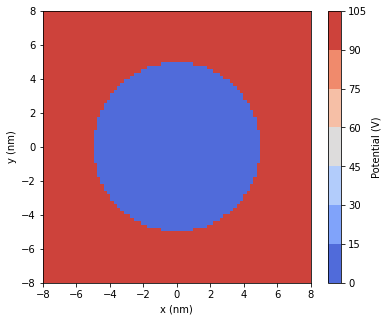

In [12]:
fig, ax = plt.subplots(1, figsize = (6,5))
con = ax.contourf(xx, yy, bandedge, cmap = 'coolwarm')
cbar = plt.colorbar(con)
cbar.set_label('Potential (V)')
ax.set_xlabel('x (nm)')
ax.set_ylabel('y (nm)')

plt.savefig('./Images/bandstructure.png', dpi = 2000)

In [13]:
bandedge1D = kp8data['00000']['bandedge_Gamma_1d_horizontal_slice_middle_along_y.dat'].variables['Band_Edge'].value
y =  kp8data['00000']['bandedge_Gamma_1d_horizontal_slice_middle_along_y.dat'].coords['y'].value

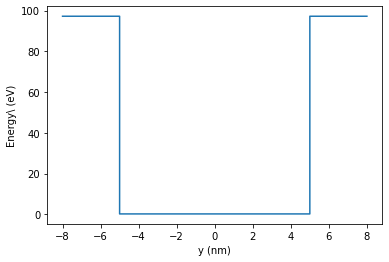

In [14]:
fig, ax = plt.subplots()
ax.plot(y, bandedge1D)
ax.set_xlabel('y (nm)')
ax.set_ylabel(r'Energy\ (eV)')

plt.savefig('./Images/1dbandedge.png', dpi = 2000)

Combining the two plots into one

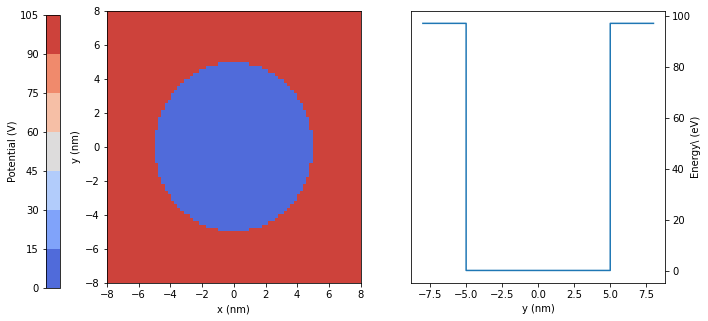

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
con = ax1.contourf(xx, yy, bandedge, cmap = 'coolwarm')
cbaxes = fig.add_axes([0.04, 0.11, 0.02, 0.76]) 
cbar = plt.colorbar(con, cax = cbaxes)
cbar.ax.yaxis.set_ticks_position('left')
cbar.set_label('Potential (V)', labelpad = -53)
ax1.set_xlabel('x (nm)')
ax1.set_ylabel('y (nm)')

ax2.plot(y, bandedge1D)
ax2.set_xlabel('y (nm)')
ax2.set_ylabel(r'Energy\ (eV)', loc = 'center', labelpad = -290)
ax2.yaxis.set_ticks_position('right')
ax2.yaxis.tick_right()

plt.savefig('./Images/combinedBandedge.png', dpi = 2000)

## Absorbtion

In [16]:
kp8data['00000']['Optics']['absorption_quantum_region_kp8_x_eV.dat']

DataFile
fullpath: D:\nextnano output\2Dcircular_infinite_well_GaAs_inter_kp8\bias_00000\Optics\absorption_quantum_region_kp8_x_eV.dat
Coordinates: 0 datasets
Variables: 2 datasets
	name: Energy - unit: eV - shape: (30001,)
	name: Absorption - unit: cm^-1 - shape: (30001,)

We want to plot the absorption for each polarisation direction, so we get the data for the x, y and z directions

In [17]:
E = kp8data['00000']['Optics']['absorption_quantum_region_kp8_z_eV.dat'].variables['Energy'].value
aX = kp8data['00000']['Optics']['absorption_quantum_region_kp8_x_eV.dat'].variables['Absorption'].value
aY = kp8data['00000']['Optics']['absorption_quantum_region_kp8_y_eV.dat'].variables['Absorption'].value
aZ = kp8data['00000']['Optics']['absorption_quantum_region_kp8_z_eV.dat'].variables['Absorption'].value

### Getting the peaks of absorption

We can use a <code>SciPy</code> package to find the peaks of the absorption spectrum. This will help us in identifying the eigenenergies for the bands. It is not stricly necessary to find the peaks using <code>SciPy</code>, but it will aid the plotting of graphs.

In [18]:
from scipy.signal import find_peaks

In [19]:
peaks, _ = find_peaks(aY, height = 0)
peaks

array([16751, 17032, 18056, 18106, 18282, 18824, 18957, 19194, 19713,
       20045, 20269, 20593, 21617, 21731, 22128, 22651, 23067, 23165,
       23548, 24107, 25036, 25329, 25585], dtype=int64)

Get the first peak value

In [20]:
aY[peaks][0]

5838.546

Get the highest peak

In [21]:
np.max(aY[peaks])

6600.994

Get the corresponding index


In [22]:
np.where(aY == np.max(aY[peaks]))

(array([20593], dtype=int64),)

### Plotting the absorption

We plot the polarisation for all directions onto a single graph, and then we identify the peaks of interest and find its corresponding energies on the x-axis.

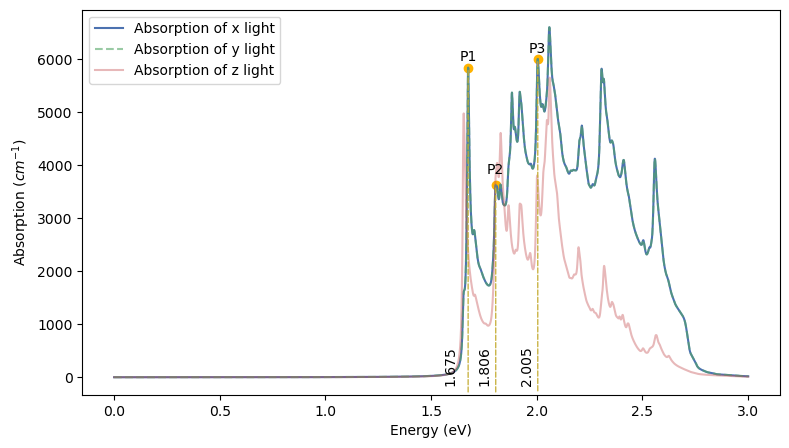

In [23]:
plt.style.use('default')
plt.style.use('seaborn-deep')
fig, ax = plt.subplots(1, figsize = (9,5))

ax.set_xlabel('Energy (eV)')
ax.set_ylabel(r'Absorption $(cm ^{-1})$')

##FIRST PEAK
# ax.axvline(E[peaks][0], ymax = 0.85, color = 'r', ls = '--')
# ax.text(E[peaks][0] - 0.03, +150, str(E[peaks][0]), transform = ax.transData, ha='right')
# ax.text(1.5, a[peaks][0] + 200, str(a[peaks][0]), transform = ax.transData)

ax1, = ax.plot(E, aX, alpha = 1)
ax2, = ax.plot(E, aY, '--', alpha = 0.6)
ax3, = ax.plot(E, aZ, alpha = 0.4)


temp = 0
ax.scatter(E[peaks[temp]], aX[peaks][temp], color = '#ffb300')
ax.annotate(text = '', xy = (E[peaks][temp], ax.get_ylim()[0]), xytext = (E[peaks][temp], aX[peaks][temp]), arrowprops = dict(arrowstyle = '-', linestyle = '--', color = '#c4ac33', alpha = 0.9))
ax.text(E[peaks][temp], aX[peaks][temp]+200, 'P1', ha= 'center', va = 'center')
# ax.annotate(text = 'P1', xy = (E[peaks][temp], a[peaks][temp]), xytext = (1.3, 1800), arrowprops = dict(arrowstyle = '<-'))
ax.text(E[peaks][temp]-0.05, -100, str(round(E[peaks][temp],3)), ha = 'right', rotation = 90)

temp = 2
ax.scatter(E[peaks[temp]], aX[peaks][temp], color = '#ffb300')
ax.annotate(text = '', xy = (E[peaks][temp], ax.get_ylim()[0]), xytext = (E[peaks][temp], aX[peaks][temp]), arrowprops = dict(arrowstyle = '-', linestyle = '--', color = '#c4ac33', alpha = 0.9))
ax.text(E[peaks][temp], aX[peaks][temp]+300, 'P2', ha= 'center', va=  'center')
# ax.annotate(text = 'P2', xy = (E[peaks][temp], a[peaks][temp]), xytext = (2.3, 4000), arrowprops = dict(arrowstyle = '<-'))
ax.text(E[peaks][temp]-0.02, -100, str(round(E[peaks][temp],3)), ha = 'right', rotation = 90)

temp = 9
ax.scatter(E[peaks[temp]], aX[peaks][temp], color = '#ffb300')
ax.annotate(text = '', xy = (E[peaks][temp], ax.get_ylim()[0]), xytext = (E[peaks][temp], aX[peaks][temp]), arrowprops = dict(arrowstyle = '-', linestyle = '--', color = '#c4ac33', alpha = 0.9))
ax.text(E[peaks][temp], aX[peaks][temp]+200, 'P3', ha= 'center', va = 'center')
# ax.annotate(text = 'P3', xy = (E[peaks][temp], a[peaks][temp]), xytext = (2.6, 2000), arrowprops = dict(arrowstyle = '<-'))
ax.text(E[peaks][temp]-0.02, -100, str(round(E[peaks][temp],3)), ha = 'right', rotation = 90)

##Biggest peak
# ax.scatter(E[peaks][np.argmax(a[peaks])], a[peaks][np.argmax(a[peaks])], color = 'orange')
# ax.annotate(text = '', xy = (E[peaks][np.argmax(a[peaks])], ax.get_ylim()[0]), xytext = (E[peaks][np.argmax(a[peaks])], a[peaks][np.argmax(a[peaks])]), arrowprops = dict(arrowstyle = '-', linestyle = '--', color = 'red'))
# ax.text(E[np.where(a == np.max(a[peaks]))]+0.05, np.max(a[peaks]) - 100, str(np.max(a[peaks])),transform = ax.transData)
# ax.text(E[peaks][np.argmax(a[peaks])] - 0.02, -100, str(E[peaks][np.argmax(a[peaks])]), transform = ax.transData, rotation = 90, ha = 'right')


titles = []
l = ['x', 'y', 'z']
for item in l:
    titles.append('Absorption of '+str(item) +' light')

for title in titles:
    plt.legend([ax1, ax2, ax3], titles)
plt.savefig('./Images/absorption.png', dpi = 2000)

## Eigenvalues, transition energies and occupations

In [24]:
num = kp8data['00000']['Quantum']['energy_spectrum_quantum_region_kp8_00000.dat'].variables['no.'].value
eigenE = kp8data['00000']['Quantum']['energy_spectrum_quantum_region_kp8_00000.dat'].variables['Energy'].value

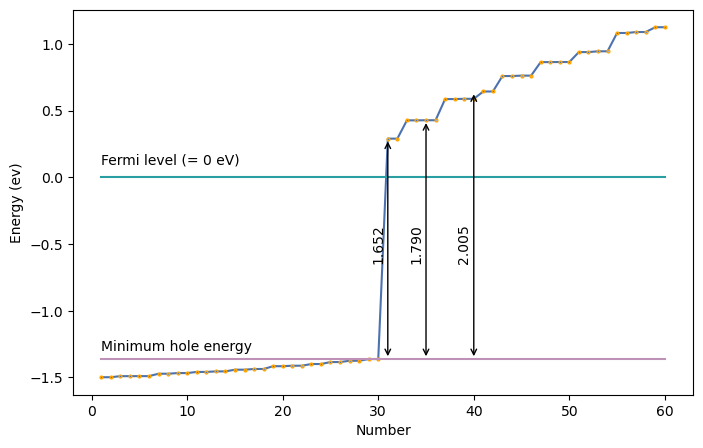

In [25]:
fig, ax = plt.subplots(1, figsize = (8,5))
ax.plot(num, eigenE, '-o', markerfacecolor = 'None', markeredgecolor = 'orange', ms = 2)

#plotting the zero line (fermi level)
zeros = np.zeros(np.size(num))
ax.plot(num, zeros, color = '#299fa3')
ax.text(1, 0.1, 'Fermi level (= 0 eV)')

#plotting the minimum hole energy
minimum = np.zeros(np.size(num)) + eigenE[29]

ax.plot(num, minimum, color = '#bd91b8')
ax.text(1, -1.3, 'Minimum hole energy')

ax.set_xlabel('Number')
ax.set_ylabel('Energy (ev)')

xoffset = 1
ax.annotate(text = '', xy = (31, eigenE[31]), xytext = (31, eigenE[29]), arrowprops = dict(arrowstyle = '<->'))
ax.text(31 - xoffset, -0.5, round(eigenE[31] - eigenE[29],3), rotation = 90, va = 'center', ha = 'center')

ax.annotate(text = '', xy = (35, eigenE[35]), xytext = (35, eigenE[29]), arrowprops = dict(arrowstyle = '<->'))
ax.text(35 - xoffset, -0.5, format(round(eigenE[35] - eigenE[29],3),'.3f'), rotation = 90, va = 'center', ha = 'center')

ax.annotate(text = '', xy = (40, eigenE[40]), xytext = (40, eigenE[29]), arrowprops = dict(arrowstyle = '<->'))
ax.text(40 - xoffset, -0.5, round(eigenE[40] - eigenE[29],3), rotation = 90, va = 'center', ha = 'center')

plt.savefig('./Images/energy_levels.png', dpi = 2000)

## Occupation

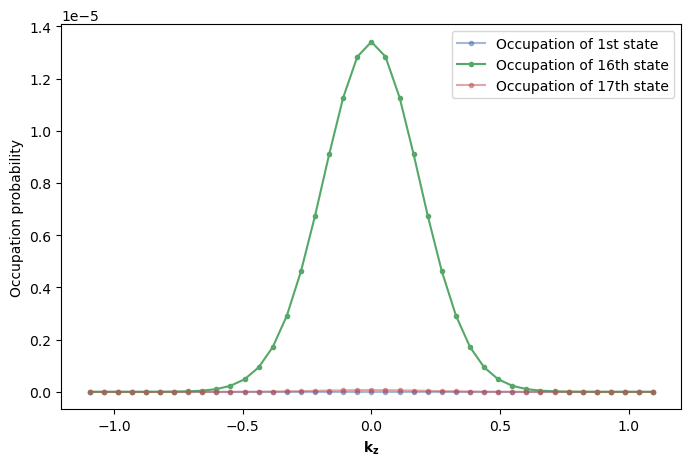

In [32]:
occu1 = kp8data['00000']['Optics']['occupation_disp_quantum_region_kp8_1.dat'].variables['occupation'].value
occu2 = kp8data['00000']['Optics']['occupation_disp_quantum_region_kp8_16.dat'].variables['occupation'].value
occu3 = kp8data['00000']['Optics']['occupation_disp_quantum_region_kp8_17.dat'].variables['occupation'].value
kx = kp8data['00000']['Optics']['occupation_disp_quantum_region_kp8_16.dat'].variables['kx'].value

fig, ax = plt.subplots(1, figsize = (8,5))
markersize = 3
occuplt1,  = ax.plot(kx, occu1, '-o', markersize = markersize, alpha = 0.5)
occuplt2,  = ax.plot(kx, occu2, '-o', markersize = markersize)
occuplt3,  = ax.plot(kx, occu3, '-o', markersize = markersize, alpha = 0.5)

ax.legend([occuplt1, occuplt2, occuplt3], ['Occupation of 1st state', 'Occupation of 16th state', 'Occupation of 17th state'])

# ax.set_title("Occupation probabilities")
ax.set_xlabel(r'$\mathbf{k_z}$')
ax.set_ylabel('Occupation probability')
plt.savefig('./Images/occupation.png', dpi = 2000)

## Eigenstates

To plot the eigenstates of the single band calculation, we use the variable <code>singlebanddata</code> instead. We want to visualise the eigenstates and wavefunction amplitudes in 3D. For this, we will require an additional package.

In [27]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors

These files are chosen to find consecutive excited states. Degenerate states are skipped.

In [28]:
psi1 = singlebanddata['00000']['Quantum']['amplitudes_quantum_region_Gamma_00000.vtr'].variables['Psi_1'].value
psi2 = singlebanddata['00000']['Quantum']['amplitudes_quantum_region_Gamma_00000.vtr'].variables['Psi_2'].value
psi3 = singlebanddata['00000']['Quantum']['amplitudes_quantum_region_Gamma_00000.vtr'].variables['Psi_4'].value
psi4 = singlebanddata['00000']['Quantum']['amplitudes_quantum_region_Gamma_00000.vtr'].variables['Psi_6'].value
psi5 = singlebanddata['00000']['Quantum']['amplitudes_quantum_region_Gamma_00000.vtr'].variables['Psi_7'].value
psi6 = singlebanddata['00000']['Quantum']['amplitudes_quantum_region_Gamma_00000.vtr'].variables['Psi_9'].value

In [29]:
eigenX = singlebanddata['00000']['Quantum']['amplitudes_quantum_region_Gamma_00000.vtr'].coords['x'].value
eigenY = singlebanddata['00000']['Quantum']['amplitudes_quantum_region_Gamma_00000.vtr'].coords['y'].value
XX, YY = np.meshgrid(eigenX, eigenY)

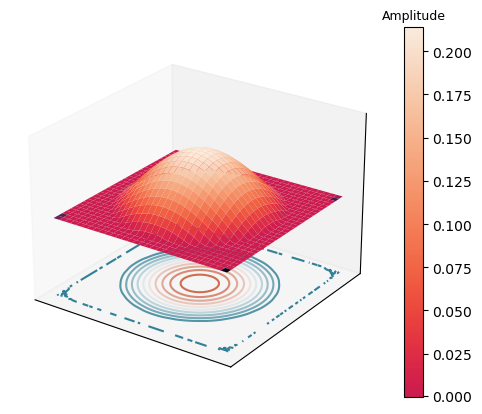

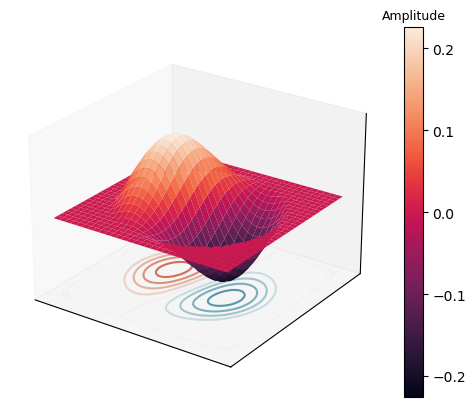

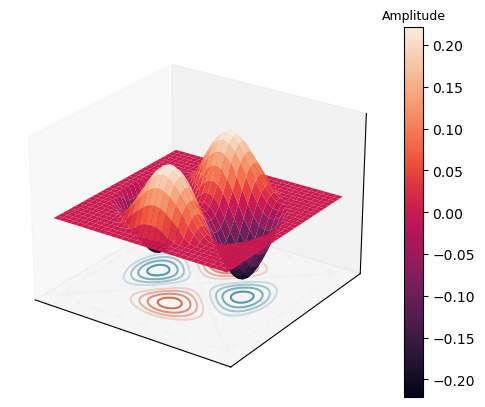

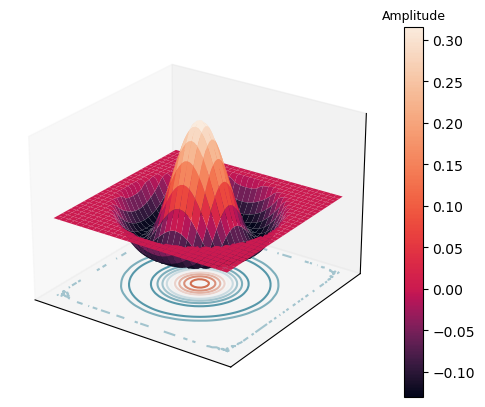

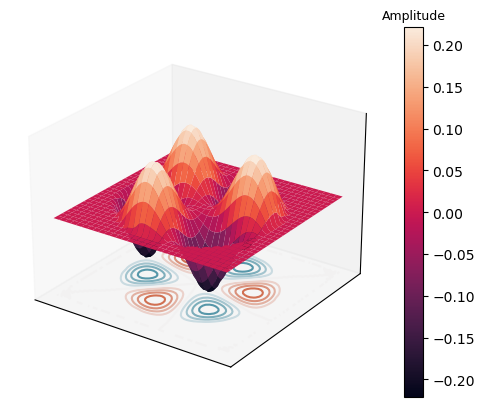

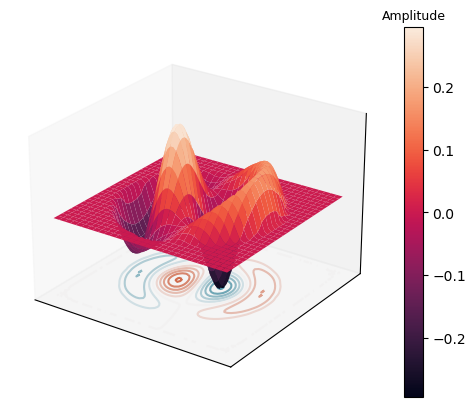

In [30]:
c1 = sns.color_palette("rocket", as_cmap=True)

offset = np.zeros(6) - 0.3
for i in range(1,7):
    divnorm = colors.TwoSlopeNorm(vcenter = 0)
    
    fig, ax = plt.subplots(subplot_kw = {'projection' : '3d'})
    exec(f'psi = psi{i}')
    surf = ax.plot_surface(XX, YY, psi, cmap = c1, norm = divnorm)
    cbar = plt.colorbar(surf)
    cbar.ax.set_title('Amplitude', fontsize = 9)
    ax.tick_params(labelbottom=False, labelleft=False)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.zaxis.set_ticks([])
    ax.view_init(25, 90+35)
    ax.set_zlim(-0.3,0.3)
    ax.contour(XX, YY, psi, 10, zdir = 'z', cmap=sns.diverging_palette(220, 20, s= 85,as_cmap=True), linestyles="solid", offset= offset[i-1])
    plt.savefig(f'./Images/psi{i}.png', dpi = 2000)